# Домашнее задание 2, задача 1. Нахождение ранга корневого дерева

В этом задании требуется реализовать нахождение ранга корневого дерева с помощью поиска в глубину.

*Ранг* определяется для каждой вершины дерева. Для листьев ранг равен нулю. Для промежуточной вершины ранг равен максимуму среди рангов вершин ее потомков, если максимальный ранг среди потомков достигается на одном потомке, и ранг на 1 больше ранга потомков, если максимальный ранг среди потомков достигается сразу на двух потомках. Рангом дерева называется ранг ее корня.

Для примера, ранги вершин дерева на картинке ниже подписаны в самих вершинах. Ранг всего дерева равен 2.

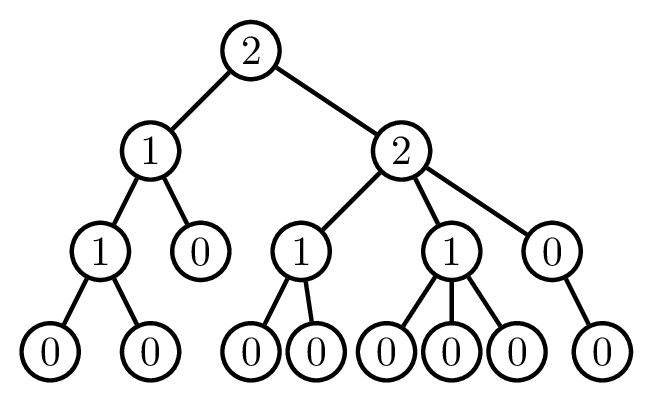


---
**Правила сдачи.** Это первая из двух задач домашнего задания 2. Каждая задача оценивается в 5 баллов.

Дедлайн второго домашнего задания --- **22 февраля в 19:00**. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 23 февраля. 

Также можно отправить решения до **19:00 20 февраля**. Тогда они будут проверены до 19:00 21 февраля и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---

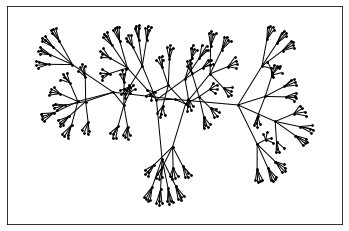

In [44]:
# Задаем граф

import networkx as nx
import matplotlib.pyplot as plt

# В этой строчке задается случайное дерево на 100 вершинах. При каждом перезапуске блока будет создаваться новое дерево.
#tree = nx.random_tree(100)

# В варианте в строчке ниже генерируется регулярное дерево ветвления 4 и глубины 4
tree = nx.generators.classic.balanced_tree(4, 4)

# В варианте в строчке ниже генерируется биномиальное дерево порядка 6
# tree = nx.binomial_tree(6)

#nx.draw_networkx(tree)

# Рисуем граф
def draw_G(G):
    options = {
        "node_size": 3,
        "node_color": "black",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }

    nx.draw_networkx(G, with_labels=False, **options)
    plt.show()
    
draw_G(tree)

In [46]:
# В этом блоке нужно реализовать подсчет ранга дерева с помощью поиска в глубину
# Мы считаем вершину с меткой 0 корнем дерева

# Заводим множество посещенных вершин
visited = {}
for v in tree:
  visited[v] = False

# В этой функции мы будем подсчитывать ранг дерева с корнем в вершине v
def count_rank(v):
    # Реализуйте здесь ваше решение

    # Заводим массив rank-ов вершин
    rank = {}
    for i in tree:
        rank[i] = -1

    # Заводим массив потомков вершин
    neigbour = {}
    for i in tree:
        neigbour[i] = -1

    def is_leaf(v):
        return  0 == len(neigbour[v])

    def calc_rank(v):
        if is_leaf(v): 
            rank[v] = 0
        else:
            neighbours_ranks = sorted([rank[i] for i in neigbour[v]])
            if len(neighbours_ranks) >=2 and (neighbours_ranks[-1] == neighbours_ranks[-2]):
            # число потомков больше 2-х и два из низ имеют макс.rank
                rank[v] = neighbours_ranks[-1] + 1
            else:
                rank[v] = neighbours_ranks[-1]

    def on_enter(v, from_v=None, tree=None):
        # Заполняем список вершин потомков, исключая из списка вершину, из которйо пришли
        neigbour[v]=list(set(list(nx.neighbors(tree, v)))-set([from_v]))

    def on_exit(v):
        calc_rank(v)

    def Explore(v, from_v=None, tree=None):
        visited[v]= True
        
        on_enter(v, from_v=from_v, tree=tree)
    
        for u in list(nx.neighbors(tree, v)):
            if not visited[u]:
                Explore(u, from_v=v, tree=tree)
        on_exit(v)

    Explore(v, tree=tree)
    print(rank)

    return rank[v]

    
print(f'Ранг дерева: {count_rank(0)}')


{0: 4, 1: 3, 2: 3, 3: 3, 4: 3, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [3]:
################################


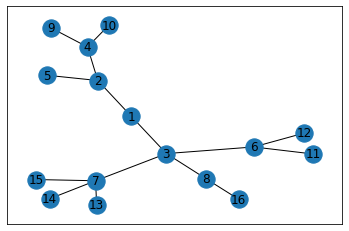

In [27]:
# Строим тестовое дерево как преамбуде к заданию. на нем отлаживаемся
tree = nx.Graph()
tree.add_nodes_from(list(range(1,17)))
tree.add_edges_from([
    (1,2),(1,3),(2,4),(2,5),(4,9),(4,10),
    (3,6),(3,7),(3,8),(6,11),(6,12),(7,13),(7,14),(7,15),(8,16) ])

nx.draw_networkx(tree)

In [40]:
# Заводим множество посещенных вершин
visited = {}
for v in tree:
  visited[v] = False

def my_count_rank(v):
    # Заводим массив rank-ов вершин
    rank = {}
    for i in tree:
        rank[i] = -1

    # Заводим массив потомков вершин
    neigbour = {}
    for i in tree:
        neigbour[i] = -1

    def is_leaf(v):
        return  0 == len(neigbour[v])

    def calc_rank(v):
        if is_leaf(v): 
            rank[v] = 0
        else:
            neighbours_ranks = sorted([rank[i] for i in neigbour[v]])
            if len(neighbours_ranks) >=2 and (neighbours_ranks[-1] == neighbours_ranks[-2]):
            # число потомков больше 2-х и два из низ имеют макс.rank
                rank[v] = neighbours_ranks[-1] + 1
            else:
                rank[v] = neighbours_ranks[-1]

    def on_enter(v, from_v=None, tree=None):
        # Заполняем список вершин потомков, исключая из списка вершину, из которйо пришли
        neigbour[v]=list(set(list(nx.neighbors(tree, v)))-set([from_v]))

    def on_exit(v):
        calc_rank(v)

    def Explore(v, from_v=None, tree=None):
        visited[v]= True
        
        on_enter(v, from_v=from_v, tree=tree)
    
        for u in list(nx.neighbors(tree, v)):
            if not visited[u]:
                Explore(u, from_v=v, tree=tree)
        on_exit(v)

    Explore(v, tree=tree)
    #print(rank)

    return rank[v]

my_count_rank(1)

{1: 2, 2: 1, 3: 2, 4: 1, 5: 0, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0}


2